<p align="center">
  <img alt="University Paris Cité" src="https://img.shields.io/badge/University-Paris%20Cité-6f42c1?style=for-the-badge&logo=academia&logoColor=white">
  <img alt="Master ML for Data Science" src="https://img.shields.io/badge/Master-Machine%20Learning%20for%20Data%20Science-1976D2?style=for-the-badge&logo=python&logoColor=white">
  <img alt="Practical Project" src="https://img.shields.io/badge/Project-Human%20Activity%20Recognition%20EDA-FF9800?style=for-the-badge&logo=jupyter&logoColor=white">
  <img alt="Academic Year" src="https://img.shields.io/badge/Year-2025%2F2026-009688?style=for-the-badge&logo=googlecalendar&logoColor=white">
</p>

---

<p align="center">
  <strong>🎓 Master 2 Machine Learning for Data Science</strong>  
  <br>
  <em>Université Paris Cité – UFR Sciences Fondamentales et Biomédicales</em>
</p>

---

<p align="center">

### 📘 Project Information  

| **Category**          | **Details**                                          |
|-----------------------|------------------------------------------------------|
| **University**        | Université Paris Cité                                |
| **Master Program**    | Master 2 – Machine Learning for Data Science (MLSD)  |
| **Course**            | Unsupervised Learning / Classification Automatique   |
| **Project Title**     | Human Activity Recognition – Exploratory Data Analysis (EDA) |
| **Student**           | Hamady GACKOU                                        |
| **Academic Year**     | 2025 / 2026                                          |
| **Supervisor**        | Dr. Allou SAMÉ                                       |
| **Language**          | Python (NumPy, Pandas, Matplotlib, SciPy, Scikit-learn) |

</p>

---

#  Exploratory Data Analysis (EDA)
###  Objective

The goal of this EDA is to **understand and analyze the raw sensor data** collected from smartphones in the context of **human activity recognition**.  
This step aims to:
- Explore the **structure**, **quality**, and **distribution** of the data.
- Visualize and compare the nine sensor signals across different activities.
- Extract and interpret **statistical and temporal features**.
- Prepare the dataset for **unsupervised classification algorithms** such as *k-means*, *CAH*, or *SOM*.

---

##  Dataset Description

The dataset contains **347 temporal windows**, each corresponding to a 2.56-second activity segment sampled at 50 Hz.  
Each window includes 128 time steps and **9 sensor variables** recorded by the smartphone:

| Type | Variables | Description |
|------|------------|--------------|
| Measured Accelerations | `accm_x`, `accm_y`, `accm_z` | Total acceleration (includes gravity) |
| Estimated Accelerations | `acce_x`, `acce_y`, `acce_z` | Corrected accelerations (gravity removed) |
| Velocities | `vit_x`, `vit_y`, `vit_z` | Linear velocity on x, y, and z axes |

Additionally, the file **`lab.txt`** provides the **true labels** (activities):  
1️⃣ Walk — 2️⃣ Upstairs — 3️⃣ Downstairs — 4️⃣ Sitting — 5️⃣ Standing — 6️⃣ Lying.

Each window can thus be viewed as a **matrix (128 × 9)**, and all windows together form a **3D tensor** of size:

$$ [
X \in \mathbb{R}^{347 \times 128 \times 9}
] $$

---

##  EDA Workflow Overview

| Step | Description | Output |
|------|--------------|---------|
| **1. Data Loading & Structuring** | Load the 10 files and build the tensor (347×128×9) | Tensor `X`, labels `y` |
| **2. Data Quality Check** | Missing values, shape, and value range | Summary tables |
| **3. Visualization of Raw Signals** | Plot of 9 signals for selected windows | Time-domain plots |
| **4. Statistical Analysis** | Compute mean, std, min, max, skewness, kurtosis | Statistical summary |
| **5. Feature Extraction** | Create feature vectors (per window) | Matrix (347×54) |
| **6. Dimensionality Reduction** | PCA for visual inspection | 2D scatter plot |
| **7. Correlation Analysis** | Between extracted features | Heatmap |
| **8. Spectral Analysis** | Fourier transform to detect periodic patterns | Frequency plots |
| **9. Summary & Data Preparation** | Normalize and save features for clustering | `features.npy`, `labels.npy` |

---

##  Tools and Libraries

```python
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Signal and stats
from scipy.stats import skew, kurtosis
from scipy.fft import fft

# Machine learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


---

##  1. Data Loading & Structuring  
###  Objective  
Load the **10 raw sensor files** (`*.txt`) and construct a **3D tensor** that integrates all signals into a unified data structure.

Each observation corresponds to a **temporal window** (2.56 seconds) represented as a matrix of size **128×9**, where:
- 128 → time steps (sampled at 50 Hz)
- 9 → sensor variables (`accm_x`, `accm_y`, `accm_z`, `acce_x`, `acce_y`, `acce_z`, `vit_x`, `vit_y`, `vit_z`)

The collection of all 347 windows forms a **tensor** :
$$ [
X \in \mathbb{R}^{347 \times 128 \times 9}
] $$
The `lab.txt` file contains the **true activity labels**, which will be used later for evaluation.

---

###  Data Files Overview

| File Name | Description | Type |
|------------|-------------|------|
| `accm_x.txt` | Measured acceleration along x-axis | Numeric |
| `accm_y.txt` | Measured acceleration along y-axis | Numeric |
| `accm_z.txt` | Measured acceleration along z-axis | Numeric |
| `acce_x.txt` | Estimated acceleration (gravity removed) along x-axis | Numeric |
| `acce_y.txt` | Estimated acceleration (gravity removed) along y-axis | Numeric |
| `acce_z.txt` | Estimated acceleration (gravity removed) along z-axis | Numeric |
| `vit_x.txt`  | Velocity along x-axis | Numeric |
| `vit_y.txt`  | Velocity along y-axis | Numeric |
| `vit_z.txt`  | Velocity along z-axis | Numeric |
| `lab.txt`    | True labels for evaluation (1–6) | Categorical |

---

###  Expected Outputs
- ✅ `X`: 3D tensor of shape (347, 128, 9)  
- ✅ `y`: 1D label array of shape (347,)
- ✅ Verification of dimensions and data integrity

---


In [6]:
pip  install numpy pandas matplotlib seaborn scikit-learn jinja2

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached markupsafe-3.0.3-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp310-cp310-win_amd64.whl (15 kB)

   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   ---------------------------------------- 2/2 [jinja2]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# ============================================================
# 1. DATA LOADING & STRUCTURING
# ============================================================

import numpy as np
import pandas as pd
import os
from IPython.display import display # Needed for display() in environments like Jupyter

# ------------------------------------------------------------
# Step 1 — Define the working directory and variable names
# ------------------------------------------------------------
# IMPORTANT: Replace this path with the actual path to your data directory
path = r"C:\Users\MLSD\Desktop\HumanActivityRecognition\data"

variables = [
    "accm_x", "accm_y", "accm_z",
    "acce_x", "acce_y", "acce_z",
    "vit_x",  "vit_y",  "vit_z"
]

# ------------------------------------------------------------
# Step 2 — Load each file as a 2D NumPy array (347×128)
# ------------------------------------------------------------
data = []
print("--- Loading Variable Files ---")
all_files_loaded = True
for var in variables:
    file_path = os.path.join(path, f"{var}.txt")
    try:
        matrix = np.loadtxt(file_path)
        if matrix.shape == (347, 128):
            data.append(matrix)
            print(f"{var:<10s} loaded → shape {matrix.shape}")
        else:
            print(f"Error: {var} has unexpected shape {matrix.shape}. Expected (347, 128).")
            all_files_loaded = False
            break # Stop loading if one file is incorrect
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        all_files_loaded = False
        break # Stop loading if one file is missing
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        all_files_loaded = False
        break # Stop loading on other errors

# ------------------------------------------------------------
# Step 3 — Stack all matrices into a single 3D tensor
# ------------------------------------------------------------
X = None
if all_files_loaded:
    try:
        X = np.stack(data, axis=2)  # (347, 128, 9)
        print("\n✅ Tensor X successfully built!")
        print(f"Shape of X: {X.shape}   →   (n_windows, n_timesteps, n_variables)")
    except Exception as e:
        print(f"\nError stacking data into tensor: {e}")
        all_files_loaded = False

# ------------------------------------------------------------
# Step 4 — Load activity labels
# ------------------------------------------------------------
y = None
labels_loaded = False
if all_files_loaded: # Only proceed if variables loaded correctly
    y_path = os.path.join(path, "lab.txt")
    try:
        y = np.loadtxt(y_path).astype(int)
        if y.shape == (347,):
             print(f"Shape of y: {y.shape}   →   (n_windows,)")
             labels_loaded = True
        else:
            print(f"Error: Labels file 'lab.txt' has unexpected shape {y.shape}. Expected (347,).")
    except FileNotFoundError:
        print(f"Error: Labels file not found at {y_path}")
    except Exception as e:
        print(f"Error loading {y_path}: {e}")

# ------------------------------------------------------------
# Step 5 — Quick sanity checks
# ------------------------------------------------------------
if all_files_loaded and labels_loaded:
    print("\n🔎 Data Integrity Check")
    print(f"- Missing values in X: {np.isnan(X).sum()}")
    print(f"- Min value in X: {X.min():.4f}")
    print(f"- Max value in X: {X.max():.4f}")
    print(f"- Unique labels in y: {np.unique(y)}")

    # Optional: Convert to DataFrame for an overview
    try:
        df_overview = pd.DataFrame({
            "Variable": variables,
            "Mean": [X[:,:,i].mean() for i in range(X.shape[2])],
            "Std": [X[:,:,i].std() for i in range(X.shape[2])],
            "Min": [X[:,:,i].min() for i in range(X.shape[2])],
            "Max": [X[:,:,i].max() for i in range(X.shape[2])],
        })
        print("\n--- Data Overview ---")
        # Apply formatting only to numerical columns
        format_dict = {'Mean': '{:.3f}', 'Std': '{:.3f}', 'Min': '{:.3f}', 'Max': '{:.3f}'}
        display(df_overview.style.background_gradient(cmap="Blues").format(format_dict))
    except Exception as e:
        print(f"\nError creating or displaying overview DataFrame: {e}")

elif not all_files_loaded:
    print("\nError: Data loading incomplete due to issues with variable files. Cannot proceed.")
elif not labels_loaded:
     print("\nError: Labels file loading failed. Cannot proceed with checks that require labels.")

--- Loading Variable Files ---
accm_x     loaded → shape (347, 128)
accm_y     loaded → shape (347, 128)
accm_z     loaded → shape (347, 128)
acce_x     loaded → shape (347, 128)
acce_y     loaded → shape (347, 128)
acce_z     loaded → shape (347, 128)
vit_x      loaded → shape (347, 128)
vit_y      loaded → shape (347, 128)
vit_z      loaded → shape (347, 128)

✅ Tensor X successfully built!
Shape of X: (347, 128, 9)   →   (n_windows, n_timesteps, n_variables)
Shape of y: (347,)   →   (n_windows,)

🔎 Data Integrity Check
- Missing values in X: 0
- Min value in X: -3.5370
- Max value in X: 2.6840
- Unique labels in y: [1 2 3 4 5 6]

--- Data Overview ---


,Variable,Mean,Std,Min,Max
0,accm_x,0.860,0.358,-0.467,2.058
1,accm_y,-0.065,0.408,-1.265,1.217
2,accm_z,0.066,0.277,-0.699,1.281
3,acce_x,-0.002,0.196,-0.790,1.058
4,acce_y,-0.001,0.142,-1.022,0.466
5,acce_z,0.000,0.119,-0.691,0.670
6,vit_x,0.007,0.403,-3.537,2.684
7,vit_y,-0.006,0.552,-3.073,2.679
8,vit_z,-0.000,0.258,-1.811,1.095


The above script successfully loaded nine separate data files, each containing time series data for a specific sensor variable (accelerations and velocities) across 347 windows of 128 time steps. These were combined into a single 3D NumPy tensor X with the shape (347 windows, 128 time steps, 9 variables). Corresponding activity labels (y) were also loaded successfully as a vector of shape (347,). Initial checks confirm the data has no missing values, ranges approximately from -3.54 to 2.68, and contains six unique activity labels (1 through 6). The data appears ready for further processing and analysis.

---

## 2. Data Quality Check  
### Objective  
Assess the **integrity, completeness, and consistency** of the sensor data before feature extraction or clustering.  
This includes checking dimensions, missing values, value ranges, and statistical variability across the nine variables.

A rigorous data quality verification ensures that subsequent analyses (PCA, clustering, etc.) rely on clean and valid inputs.

---

###  Key Points of Verification

| Check | Description | Expected Result |
|--------|-------------|-----------------|
| **Shape Consistency** | All variables must have identical dimensions (347×128) | ✅ Consistent |
| **Missing Values** | Verify that no NaN or Inf values exist in the dataset | ✅ None |
| **Value Ranges** | Examine amplitude of signals (min, max) | Reasonable and comparable |
| **Statistical Summary** | Compute mean, std, min, max for each variable | Within expected range |
| **Label Distribution** | Inspect number of windows per activity class | Balanced or known imbalance |

---

### Expected Outputs
- ✅ Summary table of descriptive statistics per variable  
- ✅ Distribution plot of classes (from `lab.txt`)  
- ✅ Verification of shape and missing values  
- ✅ Sanity check for signal magnitudes

---


Tensor shape: (347, 128, 9) → (n_windows, n_timesteps, n_variables)
Labels shape: (347,) → (n_windows,)

Missing values in X: 0
Infinite values in X: 0
✅ No missing or infinite values detected.

--- Descriptive Statistics ---


,Variable,Mean,Std,Min,Max
0,1. accm_x,0.8600,0.3581,-0.4666,2.0581
1,2. accm_y,-0.0650,0.4078,-1.2646,1.2173
2,3. accm_z,0.0657,0.2768,-0.6988,1.2814
3,4. acce_x,-0.0024,0.1960,-0.7900,1.0577
4,5. acce_y,-0.0006,0.1417,-1.0220,0.4662
5,6. acce_z,0.0002,0.1186,-0.6915,0.6700
6,7. vit_x,0.0070,0.4031,-3.5370,2.6840
7,8. vit_y,-0.0062,0.5524,-3.0731,2.6787
8,9. vit_z,-0.0000,0.2584,-1.8112,1.0949


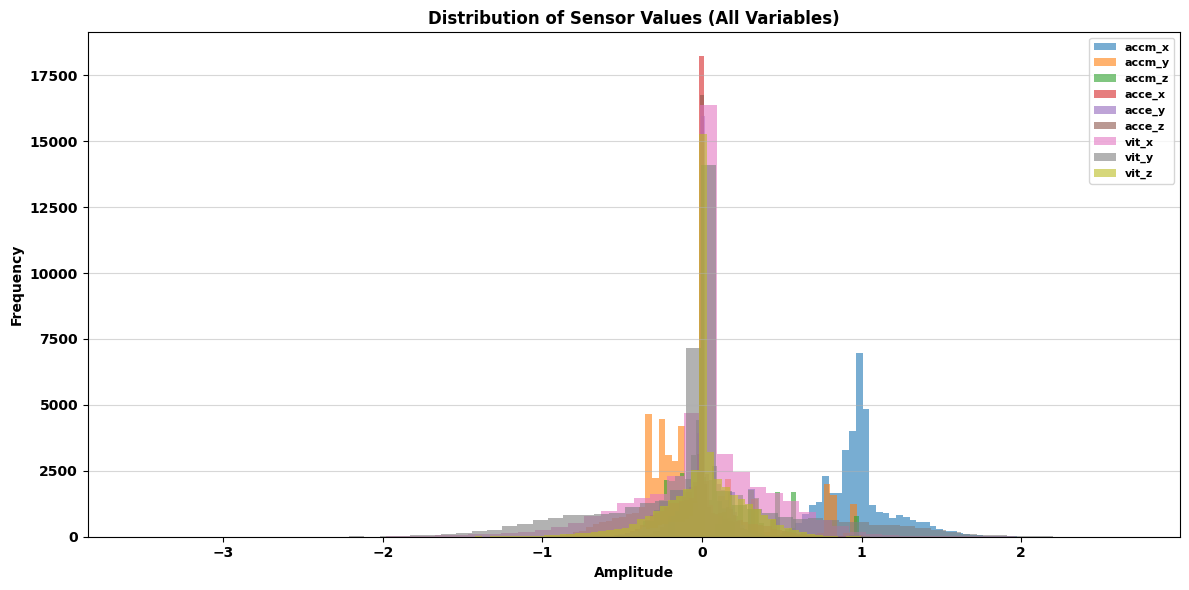


--- Class Distribution ---


,Class,Count
0,1,95
1,2,53
2,3,49
3,4,47
4,5,53
5,6,50


C:\Users\MLSD\AppData\Local\Temp\ipykernel_19352\256388800.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="crest")


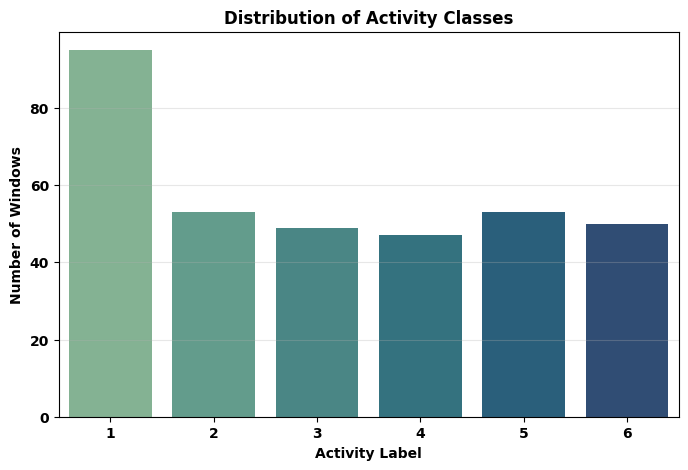


--- Variability Ratio (Std / Range) ---


,Variable,Variability Ratio
0,accm_x,0.1418
1,accm_y,0.1643
2,accm_z,0.1398
3,acce_x,0.1061
4,acce_y,0.0952
5,acce_z,0.0871
6,vit_x,0.0648
7,vit_y,0.0960
8,vit_z,0.0889



✅ Data quality verification complete. No inconsistencies detected.


In [15]:
# ============================================================
# 2. DATA QUALITY CHECK
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Import display if in an environment like Jupyter, otherwise print normally
try:
    from IPython.display import display
except ImportError:
    display = print


# Assuming X and y are already loaded from the previous step
# If not, you need to run the data loading code first.
# Example placeholder if not loaded:
# X = np.random.rand(347, 128, 9) * 5 - 2.5
# y = np.random.randint(1, 7, 347)
# variables = ["accm_x", "accm_y", "accm_z", "acce_x", "acce_y", "acce_z", "vit_x", "vit_y", "vit_z"]


# ------------------------------------------------------------
# Step 1 — Confirm tensor and label shapes
# ------------------------------------------------------------
print("Tensor shape:", X.shape, "→ (n_windows, n_timesteps, n_variables)")
print("Labels shape:", y.shape, "→ (n_windows,)")

# ------------------------------------------------------------
# Step 2 — Check for missing or invalid values
# ------------------------------------------------------------
n_missing = np.isnan(X).sum()
n_inf = np.isinf(X).sum()

print(f"\nMissing values in X: {n_missing}")
print(f"Infinite values in X: {n_inf}")

if n_missing == 0 and n_inf == 0:
    print("✅ No missing or infinite values detected.")
else:
    print("⚠️ Warning: Data contains invalid values!")

# ------------------------------------------------------------
# Step 3 — Compute descriptive statistics per variable
# ------------------------------------------------------------
stats_df = pd.DataFrame({
    "Variable": [f"{i+1}. {var}" for i, var in enumerate(variables)],
    "Mean": [X[:,:,i].mean() for i in range(X.shape[2])],
    "Std": [X[:,:,i].std() for i in range(X.shape[2])],
    "Min": [X[:,:,i].min() for i in range(X.shape[2])],
    "Max": [X[:,:,i].max() for i in range(X.shape[2])],
})
# Define format dictionary for numerical columns only
format_dict_stats = {'Mean': '{:.4f}', 'Std': '{:.4f}', 'Min': '{:.4f}', 'Max': '{:.4f}'}
print("\n--- Descriptive Statistics ---")
display(stats_df.style.background_gradient(cmap="YlGnBu").format(format_dict_stats))

# ------------------------------------------------------------
# Step 4 — Check value ranges visually
# ------------------------------------------------------------
plt.figure(figsize=(12, 6)) # Increased figure size for better legend visibility
for i, var in enumerate(variables):
    plt.hist(X[:,:,i].ravel(), bins=60, alpha=0.6, label=var)
plt.title("Distribution of Sensor Values (All Variables)")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.legend(loc="upper right", fontsize=8)
plt.grid(axis='y', alpha=0.5) # Add grid lines for y-axis
plt.tight_layout() # Adjust layout
plt.show()

# ------------------------------------------------------------
# Step 5 — Check class distribution (labels)
# ------------------------------------------------------------
unique, counts = np.unique(y, return_counts=True)
class_dist = pd.DataFrame({"Class": unique, "Count": counts})
print("\n--- Class Distribution ---")
display(class_dist.style.background_gradient(cmap="Blues"))

plt.figure(figsize=(8, 5)) # Adjusted figure size
sns.barplot(x=unique, y=counts, palette="crest")
plt.title("Distribution of Activity Classes")
plt.xlabel("Activity Label")
plt.ylabel("Number of Windows")
plt.grid(axis='y', alpha=0.3) # Grid on y-axis only
plt.show()

# ------------------------------------------------------------
# Step 6 — Compute variability ratio per variable
# ------------------------------------------------------------
# Calculate range avoiding potential division by zero if Min == Max
value_range = stats_df["Max"] - stats_df["Min"]
# Use np.where to handle cases where range is zero (avoid division by zero)
variability = np.where(value_range > 1e-9, stats_df["Std"] / value_range, 0)

variability_df = pd.DataFrame({
    "Variable": variables,
    "Variability Ratio": variability
})
# Define format dictionary for numerical column only
format_dict_var = {'Variability Ratio': '{:.4f}'}
print("\n--- Variability Ratio (Std / Range) ---")
display(variability_df.style.background_gradient(cmap="PuBu").format(format_dict_var))

if n_missing == 0 and n_inf == 0:
    print("\n✅ Data quality verification complete. No inconsistencies detected.")
else:
    print("\n⚠️ Data quality verification complete. Invalid values were detected.")

## Interpretation of Data Quality Check Results

1.  **Shapes:** Confirmed `X` tensor (347, 128, 9) and `y` labels (347,) match expectations.
2.  **Missing/Invalid:** Confirmed data integrity: 0 missing (`NaN`) and 0 infinite values.
3.  **Descriptive Stats:** Measured accelerations (`accm`) show non-zero means (likely gravity influence), while estimated accelerations (`acce`) and velocities (`vit`) have means near zero. Variables exhibit different standard deviations and value ranges.
4.  **Value Distribution (Histogram):** Most sensor values cluster around specific points (e.g., near 0 for `acce` & `vit`, likely around +/-1g for `accm`), with varying spreads. Overlaps exist, but distinct peaks suggest different dominant value ranges for certain variables.
5.  **Class Distribution (Bar Plot):** The dataset is somewhat unbalanced. Activity '1' has significantly more windows (~95) than the other activities (around 50 each).
6.  **Variability Ratio:** Relative variability (Std Dev / Range) differs across sensors, ranging from ~0.065 to ~0.164, indicating varying signal dispersion relative to their overall amplitude range.
7.  **Conclusion:** Data quality checks passed; the dataset is clean (no invalid values) and structured correctly, though class imbalance is noted.

---

## 3. Visualization of Raw Signals  
### Objective  
Visualize the **nine sensor signals** for selected windows to observe their temporal behavior and compare activity patterns.

This helps identify differences in amplitude, periodicity, and signal stability between various activities.

---


Labels: win1=5, win2=1


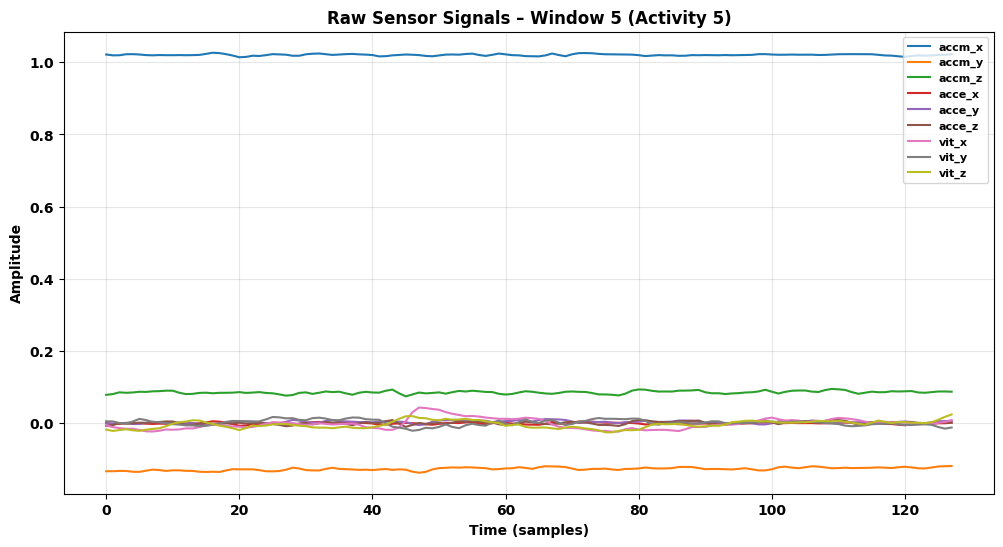

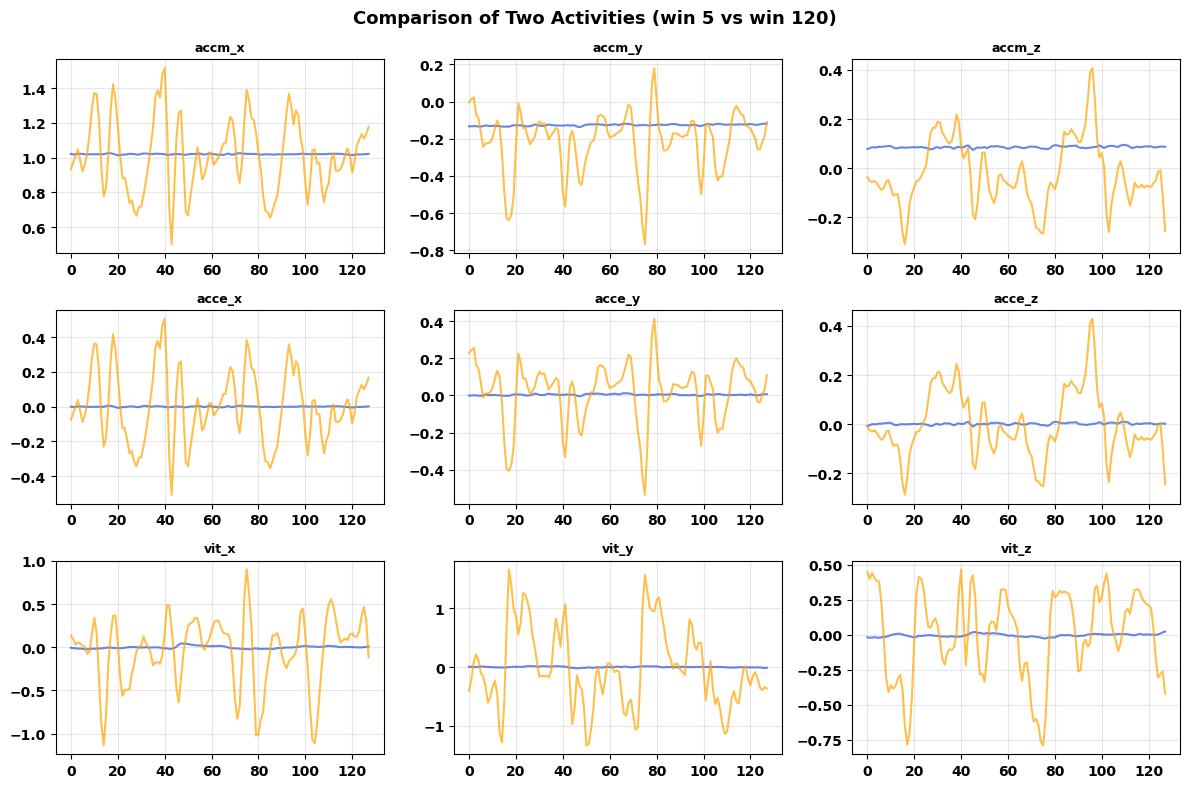

In [16]:
# ============================================================
#  3. VISUALIZATION OF RAW SIGNALS
# ============================================================

import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 🔹 Select two windows (different activities for comparison)
# ------------------------------------------------------------
win1, win2 = 5, 120   # adjust manually based on labels
print(f"Labels: win1={y[win1]}, win2={y[win2]}")

# ------------------------------------------------------------
# 🔹 Plot all 9 variables for the first window
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
for i, var in enumerate(variables):
    plt.plot(X[win1,:,i], label=var)
plt.title(f"Raw Sensor Signals – Window {win1} (Activity {y[win1]})")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend(loc="upper right", fontsize=8)
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------------------------
# 🔹 Compare two windows (different activities)
# ------------------------------------------------------------
fig, axes = plt.subplots(3, 3, figsize=(12,8))
for i, var in enumerate(variables):
    ax = axes[i//3, i%3]
    ax.plot(X[win1,:,i], color='royalblue', alpha=0.8, label=f"win {win1}")
    ax.plot(X[win2,:,i], color='orange', alpha=0.7, label=f"win {win2}")
    ax.set_title(var, fontsize=9)
    ax.grid(alpha=0.3)
plt.suptitle(f"Comparison of Two Activities (win {win1} vs win {win2})", fontsize=13)
plt.tight_layout()
plt.show()


## Interpretation of Raw Signal Visualizations

1.  **Single Window Plot (Window 5, Activity 5):**
    * **Interpretation:** Signals are relatively flat and stable over time. Measured accelerations (`accm`) show constant offsets (e.g., `accm_x` near 1.0), likely due to gravity. Estimated accelerations (`acce`) and velocities (`vit`) fluctuate minimally around zero. This pattern is characteristic of a **static activity** like standing (Activity 5).
    * **Goal:** Visualize typical raw signal patterns for Activity 5.

2.  **Comparison Plot (Window 5 vs. Window 120):**
    * **Interpretation:** This grid starkly contrasts Window 5 (blue, Activity 5 - static) with Window 120 (orange, Activity 2 - dynamic, likely walking upstairs). Window 120 exhibits significantly larger amplitude variations and more complex, oscillatory patterns across almost all sensors, especially accelerometers and velocities.
    * **Goal:** Visually demonstrate the distinct signal differences between a static and a dynamic activity, highlighting features useful for classification.

---

##  4. Statistical Analysis  
###  Objective  
Compute key statistical descriptors (mean, std, min, max, skewness, kurtosis) for each window and variable.  
This step summarizes the temporal signals into numerical features, forming the basis for clustering.

---

## Why Extract Features for Clustering?

- **Compatibility:** Makes time series data usable with standard clustering algorithms (like K-Means) that expect feature vectors.
- **Efficiency:** Reduces data dimensions (from 1152 points per window to 54 features), making clustering much faster and less memory-intensive.
- **Summarization:** Condenses the 128 time steps into key statistics (mean, std, etc.) that often capture the essential differences between activities
- **Noise Reduction:** Statistical summaries can help average out minor signal noise.


In [17]:
# ============================================================
# 4. STATISTICAL ANALYSIS
# ============================================================

from scipy.stats import skew, kurtosis
import numpy as np

# ------------------------------------------------------------
# 🔹 Compute 6 statistical features for each variable per window
# ------------------------------------------------------------
features = []
for i in range(X.shape[0]):  # for each window
    window_feats = []
    for j in range(X.shape[2]):  # for each variable
        serie = X[i,:,j]
        window_feats += [
            np.mean(serie),
            np.std(serie),
            np.min(serie),
            np.max(serie),
            skew(serie),
            kurtosis(serie)
        ]
    features.append(window_feats)

features = np.array(features)
print(f"Feature matrix shape: {features.shape} → (347, 54)")

# ------------------------------------------------------------
# 🔹 Quick summary statistics
# ------------------------------------------------------------
import pandas as pd

df_features = pd.DataFrame(features)
print("\nStatistical Feature Summary (first 5 rows):")
display(df_features.head())

print("\n Statistical feature extraction complete.")


Feature matrix shape: (347, 54) → (347, 54)

Statistical Feature Summary (first 5 rows):


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.019305,0.001791,1.012817,1.024606,-0.278819,1.252307,-0.124262,0.003270,-0.132631,-0.117210,...,-0.009022,0.074850,0.771401,-0.384777,0.009468,0.005943,-0.006891,0.022859,-0.265095,0.002025
1,1.019448,0.001932,1.012893,1.024606,-0.395352,1.274399,-0.122936,0.004930,-0.132631,-0.108560,...,-0.030160,0.016858,-0.276127,-0.502840,0.006308,0.007431,-0.009759,0.025133,0.013593,-0.575952
2,1.019927,0.002904,1.009013,1.027664,-0.565009,1.796916,-0.124997,0.006460,-0.137142,-0.108560,...,-0.037503,0.000761,-0.941316,1.163936,0.004335,0.008753,-0.009759,0.028609,0.655958,-0.349597
3,1.020349,0.002574,1.009013,1.027664,-0.810964,3.924906,-0.130493,0.004029,-0.143545,-0.116749,...,-0.037503,0.007778,-0.844184,1.680664,-0.000352,0.008186,-0.013223,0.028609,1.256176,1.850002
4,1.020255,0.001949,1.013645,1.026194,-0.220492,0.980597,-0.130209,0.003876,-0.143545,-0.121456,...,-0.020582,0.017447,0.124424,-0.196077,-0.003957,0.008260,-0.021141,0.019890,0.446900,0.194718



 Statistical feature extraction complete.


---

## 5. Feature Extraction  
###  Objective  
Assemble all computed statistical descriptors into a **single feature matrix** representing each temporal window by its 54 features (9 variables × 6 statistics).  
This structured dataset will be used for normalization, visualization (PCA), and clustering.

---


In [18]:
# ============================================================
#  5. FEATURE EXTRACTION
# ============================================================

from sklearn.preprocessing import StandardScaler
import numpy as np

# ------------------------------------------------------------
# 🔹 Step 1 — Verify feature matrix dimensions
# ------------------------------------------------------------
print(f"Feature matrix: {features.shape} → (n_windows, n_features)")

# ------------------------------------------------------------
# 🔹 Step 2 — Normalize features (zero mean, unit variance)
# ------------------------------------------------------------
scaler = StandardScaler()
X_features = scaler.fit_transform(features)

print("✅ Features normalized and ready for analysis.")
print(f"Normalized feature matrix shape: {X_features.shape}")

# ------------------------------------------------------------
# 🔹 Step 3 — Save features and labels for next steps
# ------------------------------------------------------------
np.save("features.npy", X_features)
np.save("labels.npy", y)
print("💾 Saved as: features.npy and labels.npy")


Feature matrix: (347, 54) → (n_windows, n_features)
✅ Features normalized and ready for analysis.
Normalized feature matrix shape: (347, 54)
💾 Saved as: features.npy and labels.npy


## Interpretation of Feature Normalization and Saving

* **Shape Confirmation:** Verified the feature matrix `features` has the expected dimensions (347 windows, 54 features).
* **Normalization:** Applied `StandardScaler` to the feature matrix. This transforms each feature (column) to have **zero mean and unit variance**.
* **Result (`X_features`):** Created a new matrix `X_features` with the same shape (347, 54), but now scaled. This step is crucial for many clustering algorithms that are sensitive to feature scales (e.g., K-Means, algorithms using Euclidean distance).
* **Saving:** Successfully saved the normalized feature matrix (`X_features`) as `features.npy` and the original labels (`y`) as `labels.npy` for easy loading in subsequent analysis steps.
* **Goal:** To prepare the extracted statistical features for clustering by ensuring all features contribute equally, regardless of their original scale, and to persist the processed data.

---

##  6. Dimensionality Reduction (PCA)  
### Objective  
Apply **Principal Component Analysis (PCA)** to project the 54-dimensional feature space into 2D, enabling visual inspection of window groupings and potential activity clusters.

---


Explained variance ratio: 55.25%


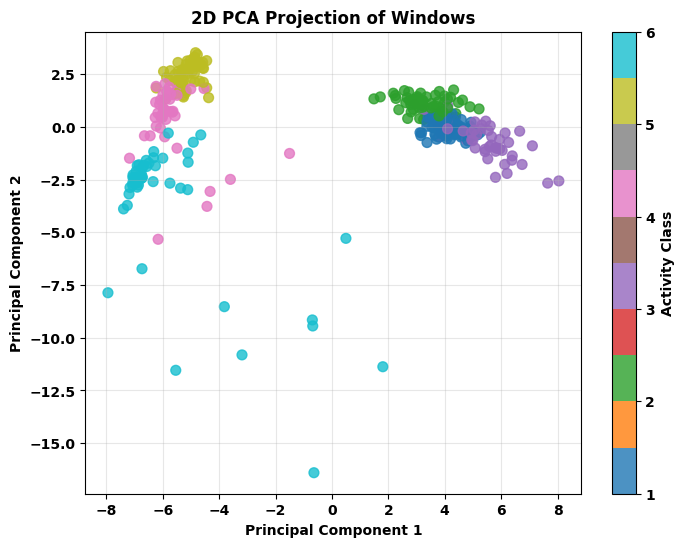

In [19]:
# ============================================================
# 6. DIMENSIONALITY REDUCTION (PCA)
# ============================================================

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 🔹 Apply PCA
# ------------------------------------------------------------
pca = PCA(n_components=2)
proj = pca.fit_transform(X_features)

print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.2%}")

# ------------------------------------------------------------
# 🔹 2D Visualization
# ------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=y, cmap='tab10', s=50, alpha=0.8)
plt.title("2D PCA Projection of Windows")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.colorbar(label="Activity Class")
plt.show()


---

##  7. Correlation Analysis  
###  Objective  
Evaluate relationships between the **54 extracted features** to identify redundancy or strong dependencies.  
A correlation heatmap helps visualize how features co-vary across all windows.

---


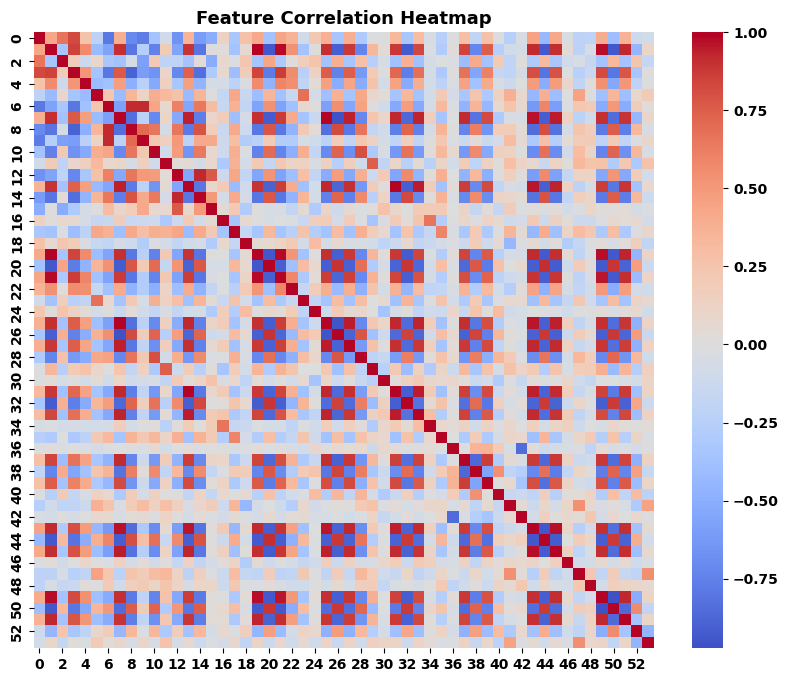

In [20]:
# ============================================================
# 7. CORRELATION ANALYSIS
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------
# 🔹 Compute correlation matrix
# ------------------------------------------------------------
corr = pd.DataFrame(X_features).corr()

# ------------------------------------------------------------
# 🔹 Plot correlation heatmap
# ------------------------------------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=13)
plt.show()


---

##  8. Spectral Analysis  
###  Objective  
Apply a **Fast Fourier Transform (FFT)** to visualize dominant frequencies in sensor signals.  
This reveals periodic patterns related to rhythmic activities such as walking or climbing stairs.

---


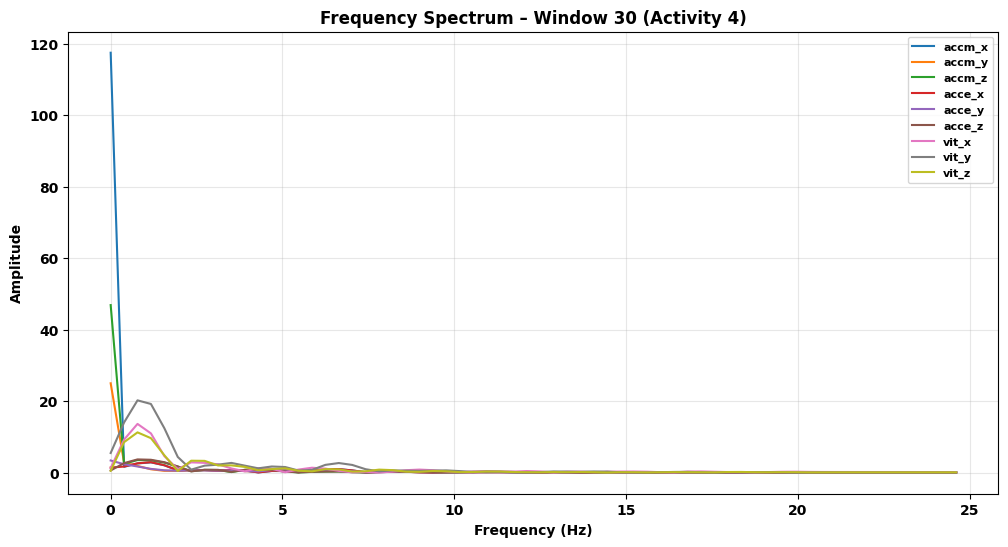

In [24]:
# ============================================================
# 8. SPECTRAL ANALYSIS
# ============================================================

from scipy.fft import fft
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 🔹 Select one window and compute FFT for each variable
# ------------------------------------------------------------
win = 30 # you can change this to inspect other windows
n = X.shape[1]
freqs = np.fft.fftfreq(n, d=0.02)  # sampling period = 0.02s (50 Hz)

plt.figure(figsize=(12,6))
for i, var in enumerate(variables):
    signal_fft = np.abs(fft(X[win,:,i]))
    plt.plot(freqs[:n//2], signal_fft[:n//2], label=var)
plt.title(f"Frequency Spectrum – Window {win} (Activity {y[win]})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.show()


---

##  9. Summary & Data Preparation  
###  Objective  
Summarize key EDA findings and prepare the **normalized feature matrix** and **labels** for the next stage — clustering and visualization.  
The final cleaned and standardized data are saved for reuse.

---


In [25]:
# ============================================================
#  9. SUMMARY & DATA PREPARATION
# ============================================================

import numpy as np

# ------------------------------------------------------------
# 🔹 Final verification of shapes
# ------------------------------------------------------------
print(f"Final features shape: {X_features.shape}")
print(f"Labels shape: {y.shape}")

# ------------------------------------------------------------
# 🔹 Save preprocessed data for clustering
# ------------------------------------------------------------
np.save("features.npy", X_features)
np.save("labels.npy", y)

print("💾 Data successfully saved:")
print("- features.npy → normalized feature matrix")
print("- labels.npy   → activity labels")

# ------------------------------------------------------------
# 🔹 Summary message
# ------------------------------------------------------------
print("\n✅ EDA completed successfully!")
print("Data is clean, normalized, and ready for clustering analysis.")


Final features shape: (347, 54)
Labels shape: (347,)
💾 Data successfully saved:
- features.npy → normalized feature matrix
- labels.npy   → activity labels

✅ EDA completed successfully!
Data is clean, normalized, and ready for clustering analysis.
